## File used to understand contents of files shared by Tao

Import Necessary Libraries For Testing

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

Create Class For Gathering Test Data

In [2]:
class PtychographyDataset(Dataset):
    def __init__(self, npz_files):

        # Initialize empty lists for inputs and labels from all files
        all_inputs = []
        all_labels = []

        # Loop through all 11 files
        for npz_file in npz_files:
            data = np.load(npz_file)
            inputs = torch.tensor(data["reciprocal"], dtype=torch.float32)
            labels = np.angle(data["real"])
            labels = torch.tensor(labels, dtype=torch.float32)

            # Ensure input and label shapes are correct 
            if len(inputs.shape) == 3:  
                inputs = inputs.unsqueeze(1)  # Add channel dim (C=1)
                labels = labels.unsqueeze(1)  # Add channel dim (C=1)

            # Append the data from file to lists
            all_inputs.append(inputs)
            all_labels.append(labels)

        # Concatenate all data 
        self.inputs = torch.cat(all_inputs, dim = 0)
        self.labels = torch.cat(all_labels, dim = 0)


    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.labels[idx]

Load Single File And Test The Data

In [3]:
# Load the .npz file
data = np.load("/home/sfowler/Groq/NewScans/scan674.npz")

# Print shape of each array in the .npz file
print("Shapes of data in file: ")
print({key: data[key].shape for key in data})
print("\n")

print("Information on data from new files!")
print("------------------------------------------")
print("\n")
# List available arrays
print("Available arrays:", data.files)

# Access specific arrays
real_array = data["real"]
reciprocal_array = data["reciprocal"]
position_array = data["position"]
probe_array = data["probe"]

# Print array shape as an example
print("Shape of 'real':", real_array.shape)
print("Shape of 'reciprocal':", reciprocal_array.shape)

# Print name, shape, and datatype
for name in data.files:
    print(f"{name}: {data[name].shape}, dtype={data[name].dtype}")

    # Print a snippet of the data (first few entries)
    print(f"First entry of {name}: {data[name][:1]}")
    print("\n")

    # Print basic statistics for numeric arrays
    if np.issubdtype(data[name].dtype, np.number):
        print(f"Min of {name}: {np.min(data[name])}")
        print(f"Max of {name}: {np.max(data[name])}")
        print(f"Mean of {name}: {np.mean(data[name])}")

    print("\n\n")

# Check the first few entries in the raw data before it's converted to a tensor
raw_data = np.load("/home/sfowler/Downloads/NewScans/scan674.npz")
print("\nRaw reciprocal data slice:\n", raw_data["reciprocal"][:1])  # Check the first entry

# Check normalization ranges
print(f"Min and Max values of the raw data before preprocessing: {raw_data['reciprocal'].min()}, {raw_data['reciprocal'].max()}")

# Check the first few entries in the raw data before it's converted to a tensor
raw_data = np.load("/home/sfowler/Downloads/NewScans/scan674.npz")
print("Raw reciprocal data slice:\n", raw_data["real"][:1])  # Check the first entry

# Check normalization ranges
print(f"\nMin and Max values of the raw data before preprocessing\n: {raw_data['real'].min()}, {raw_data['real'].max()}")

# pixel size 8nm, multiply by 128 for size
# 1.5 nm tungsten dark part, bright part is etched away area
# Application use case: Test resolution of imaging techniques

Shapes of data in file: 
{'real': (963, 128, 128), 'reciprocal': (963, 128, 128), 'position': (963, 2), 'probe': (4, 512, 512)}


Information on data from new files!
------------------------------------------


Available arrays: ['real', 'reciprocal', 'position', 'probe']
Shape of 'real': (963, 128, 128)
Shape of 'reciprocal': (963, 128, 128)
real: (963, 128, 128), dtype=complex64
First entry of real: [[[ 0.00548216-0.37880507j  0.00669001-0.38724583j
   -0.00981515-0.38123795j ...  0.31855652+0.30218917j
    0.3223898 +0.28924003j  0.33114892+0.28110525j]
  [-0.00170939-0.37640542j  0.00719145-0.37958175j
   -0.00504026-0.3694602j  ...  0.31486583+0.29081655j
    0.31401053+0.2884708j   0.32879978+0.2908244j ]
  [-0.0072184 -0.37681463j  0.01164078-0.375437j
    0.00274277-0.37032726j ...  0.32282507+0.29930246j
    0.33751622+0.2974191j   0.36338568+0.2930515j ]
  ...
  [ 0.36862034+0.30394018j  0.38733947+0.3025617j
    0.37651828+0.2917719j  ...  0.33316645+0.2798459j
    0.3579779

Load Data From All Files And Print Datasize and Shapes

In [4]:
# List of file paths
npz_files = [
    "/home/sfowler/Groq/NewScans/scan674.npz", "/home/sfowler/Groq/NewScans/scan683.npz", "/home/sfowler/Groq/NewScans/scan692.npz", 
    "/home/sfowler/Groq/NewScans/scan701.npz", "/home/sfowler/Groq/NewScans/scan710.npz", "/home/sfowler/Groq/NewScans/scan720.npz", 
    "/home/sfowler/Groq/NewScans/scan730.npz", "/home/sfowler/Groq/NewScans/scan740.npz", "/home/sfowler/Groq/NewScans/scan750.npz", 
    "/home/sfowler/Groq/NewScans/scan760.npz", "/home/sfowler/Groq/NewScans/scan770.npz"
]

print("\n\n")
# Create the dataset
dataset = PtychographyDataset(npz_files)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Check the size of the dataset
print(f"Dataset size: {len(dataset)}")

# Access a sample
sample_input, sample_label = dataset[0]
print(f"Sample input shape: {sample_input.shape}")
print(f"Sample label shape: {sample_label.shape}")

for inputs, labels in loader:
    # Print first value from the first batch
    print("\nFirst Input Value:\n", inputs[:1].cpu().numpy())  
    print("\nFirst Label Value:\n", labels[:1].cpu().numpy())  
    print("Batch shape:", inputs.shape)
    break

Dataset size: 10593
Sample input shape: torch.Size([1, 128, 128])
Sample label shape: torch.Size([1, 128, 128])

First Input Value:
 [[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]]

First Label Value:
 [[[[0.254842   0.3022707  0.4059472  ... 0.5425124  0.5662981
    0.5760666 ]
   [0.21146137 0.23126101 0.299174   ... 0.54162526 0.53518534
    0.55374366]
   [0.10203247 0.11963981 0.24028611 ... 0.5538484  0.5316079
    0.52587765]
   ...
   [0.62736005 0.70297045 0.76402664 ... 0.6695398  0.6272516
    0.60328776]
   [0.5924294  0.653572   0.78393596 ... 0.65275407 0.625689
    0.6124115 ]
   [0.591026   0.62549174 0.7257478  ... 0.652478   0.6288075
    0.624009  ]]]]
Batch shape: torch.Size([32, 1, 128, 128])


Visualize One Sample To Ensure Correct Gathering

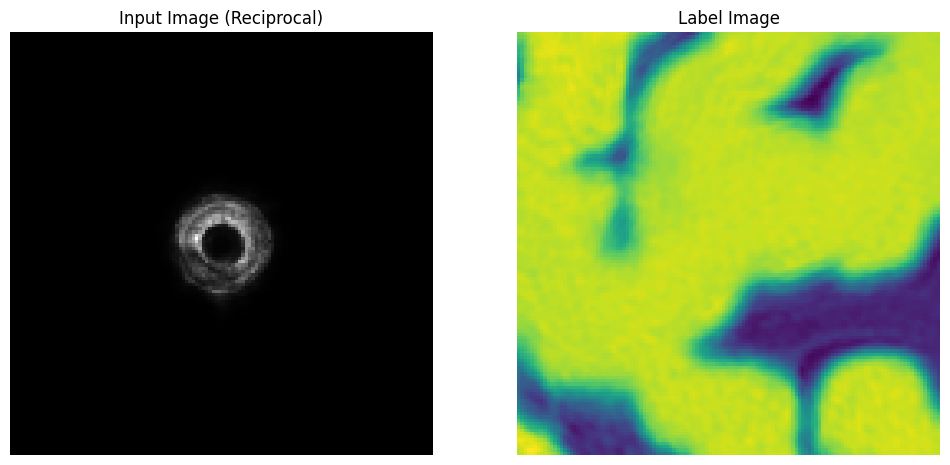

In [5]:
# Visualize the input and label data for the first sample in the batch
input_image = inputs[0, 0].cpu().numpy()  
label_image = labels[0, 0].cpu().numpy()

# Plot input and label side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(input_image, cmap='gray')
axs[0].set_title("Input Image (Reciprocal)")
axs[0].axis('off')

axs[1].imshow(label_image, cmap='viridis')
axs[1].set_title("Label Image")
axs[1].axis('off')

plt.show()